**InceptionV3**

InceptionV3, also known as GoogLeNetV3. inceptionV3 represents an evolution of the original Inception architecture (InceptionV1) and incorporates several design improvements to enhance performance and reduce the number of parameters.InceptionV3 is known for its ability to capture rich and diverse features from different scales of an image through the use of parallel convolutional branches within each Inception module. The input size is typically 299x299 pixels. InceptionV3 starts with a stem module that performs initial feature extraction.The stem module includes a series of convolutional and max-pooling layers to capture low-level features.InceptionV3 includes two auxiliary classifiers located at different depths in the network.These auxiliary classifiers are used during training to combat the vanishing gradient problem and provide additional supervision.A softmax activation function is applied to the final layer to produce class probabilities.

 Install the kaggle python package using pip

In [ ]:
pip install kaggle

You can download the JSON file by generating an token on Kaggle and then selecting the downloaded JSON file when you upload it.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/

Download Dataset

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 60% 9.00M/15.1M [00:00<00:00, 91.5MB/s]
100% 15.1M/15.1M [00:00<00:00, 122MB/s] 


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten


<ipython-input-5-4addd0ae159c>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


Split the dataset into two arrays, 'X' for training data and 'y' for testing data.Load images from both 'yes' and 'no' classes, and then display the corresponding labels.

In [ ]:
os.chdir('/content/brain_tumor_dataset/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(299,299))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/brain_tumor_dataset/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(299,299))
      X.append(img)
for i in range(1,99):
    y.append('N')
print(y)

  0%|          | 0/155 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [ ]:
print(img.shape)

(299, 299, 3)


plot the training images

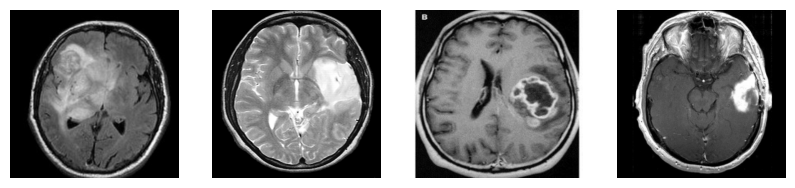

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (299, 299, 3)
Shape of an image in X_test:  (299, 299, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (169, 299, 299, 3)
X_test Shape:  (84, 299, 299, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


import InceptionV3

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define the input shape for your data
input_shape = (299, 299, 3)  # InceptionV3 expects 299x299 pixel input

# Load the InceptionV3 base model (pre-trained on ImageNet)
base_model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')

# Freeze the layers in the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Add your custom layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  # Replace num_classes with the number of your output classes

# Create your custom model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
for (i,layer) in enumerate(model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 Activation False
4 Conv2D False
5 BatchNormalization False
6 Activation False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 MaxPooling2D False
11 Conv2D False
12 BatchNormalization False
13 Activation False
14 Conv2D False
15 BatchNormalization False
16 Activation False
17 MaxPooling2D False
18 Conv2D False
19 BatchNormalization False
20 Activation False
21 Conv2D False
22 Conv2D False
23 BatchNormalization False
24 BatchNormalization False
25 Activation False
26 Activation False
27 AveragePooling2D False
28 Conv2D False
29 Conv2D False
30 Conv2D False
31 Conv2D False
32 BatchNormalization False
33 BatchNormalization False
34 BatchNormalization False
35 BatchNormalization False
36 Activation False
37 Activation False
38 Activation False
39 Activation False
40 Concatenate False
41 Conv2D False
42 BatchNormalization False
43 Activation False
44 Conv2D False
45 Conv2D False
46 BatchNormalization False
47 Batc

In [ ]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

Training

In [ ]:
from tensorflow.keras.models import Model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=20,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/20
6/6 [==============================] - 72s 11s/step - loss: 30.8712 - accuracy: 0.5562 - val_loss: 3.3004 - val_accuracy: 0.7024
Epoch 2/20
6/6 [==============================] - 59s 11s/step - loss: 5.9525 - accuracy: 0.6154 - val_loss: 5.6912 - val_accuracy: 0.6905
Epoch 3/20
6/6 [==============================] - 59s 10s/step - loss: 5.1964 - accuracy: 0.7633 - val_loss: 6.6183 - val_accuracy: 0.5476
Epoch 4/20
6/6 [==============================] - 58s 10s/step - loss: 4.6610 - accuracy: 0.6864 - val_loss: 3.0777 - val_accuracy: 0.7619
Epoch 5/20
6/6 [==============================] - 59s 10s/step - loss: 2.0319 - accuracy: 0.7929 - val_loss: 2.8108 - val_accuracy: 0.6310
Epoch 6/20
6/6 [==============================] - 60s 11s/step - loss: 1.3039 - accuracy: 0.8107 - val_loss: 1.1714 - val_accuracy: 0.7857
Epoch 7/20
6/6 [==============================] - 59s 10s/step - loss: 1.0399 - accuracy: 0.7811 - val_loss: 1.3584 - val_accuracy: 0.7738
Epoch 8/20
6/6 [==========

Testing

1/1 [==============================] - 2s 2s/step


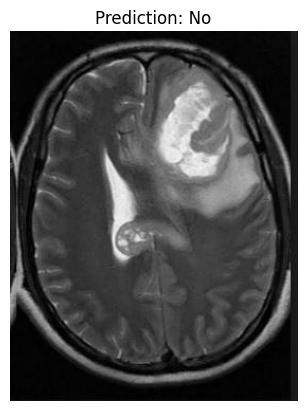

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the test image
test_image_path = "/content/yes/Y86.JPG"  # Replace with the path to your test image
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (299, 299))
test_image = np.expand_dims(test_image, axis=0)  # Add a batch dimension
test_image = test_image / 255.0  # Normalize pixel values

# Make predictions
predictions = model.predict(test_image)

# Interpret the prediction result
if predictions[0][0] > predictions[0][1]:
    prediction_label = "No"
else:
    prediction_label = "Yes"

# Display the test image along with the predicted label
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {prediction_label}")
plt.axis('off')
plt.show()